<a href="https://colab.research.google.com/github/sasamori-takuya/study_group_materials/blob/master/optimization/04_Newton_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Newton 法

**[step0]**  
Define initial_value $\boldsymbol{x}_0 \in \mathbb{R}^n$.  
Define stop threshold $\epsilon > 0$.  
Set number of updates $k=0$.  
   
**[step1]**  
Repeat the following algorithm for $k \geq 0$ until there exists $k$ satisfying $\|\nabla f(\boldsymbol{x}_k)\| < \epsilon$: 
> Set Newton direction $\boldsymbol{d}_k = - \left(\nabla^2 f(\boldsymbol{x}_k)\right)^{-1} \nabla f(\boldsymbol{x}_k)$.  
> Set $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k + \boldsymbol{d}_k$. 

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import sys
#import time

print(sys.version)
print(np.__version__)

3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
1.18.4


In [0]:
class NewtonGradientDescent:
  def __init__(self, fct, grad, hess, thres = 1e-6, iter_max = 1000, alpha = 1.0):
    self.fct = fct             # 目的関数
    self.grad = grad           # 勾配
    self.hess = hess           # ヘッセ行列
    self.thres = thres         # 更新停止の閾値
    self.iter_max = iter_max   # 最大反復回数
    self.alpha = alpha         # ステップサイズ
    self.path = None           # 解の点列
  
  def minimize(self, x):
    path = [x]
    
    for i in range(self.iter_max):
      grad = self.grad(x)
      hess_inv = np.linalg.inv(self.hess(x))
      direction = - np.dot(hess_inv, grad)
      if np.linalg.norm(grad, ord = 2, axis = None) < self.thres:
        iter_count = i + 1  # 最初の0回目の分がある
        break
      x = x + self.alpha * direction
      path.append(x)
    self.iter_count = iter_count  # 反復回数
    self.opt_pt = x                # 最適解
    self.opt_val = self.fct(x) # 関数の最小値
    self.path = np.array(path)    # 探索解の推移

# 教科書 p45 例2.6

In [0]:
def f(x):
  return 0.5 * x[0]**4 - 2 * x[0]**2 * x[1] + 4 * x[1]**2 + 8 * x[0] + 8 * x[1]

def grad_f(x):
  grad_1 = 2 * x[0]**3 - 4 * x[0] * x[1] + 8
  grad_2 = - 2 * x[0]**2 + 8 * x[1] + 8
  return np.array([grad_1, grad_2])

def hess_f(x):
  hess_11 = 6 * x[0]**2 - 4 * x[1]
  hess_12 = -4 * x[0]
  hess_22 = 8
  return np.array([[hess_11, hess_12], [hess_12, hess_22]])

iter.cnt. = 7
theor.opt.pt. = [-1.3647 -0.5344]
theor.opt.val. = -10.325648708973457
emp.opt.pt. = [-1.36465561 -0.53442877]
emp.opt.val. = -10.32564871842916


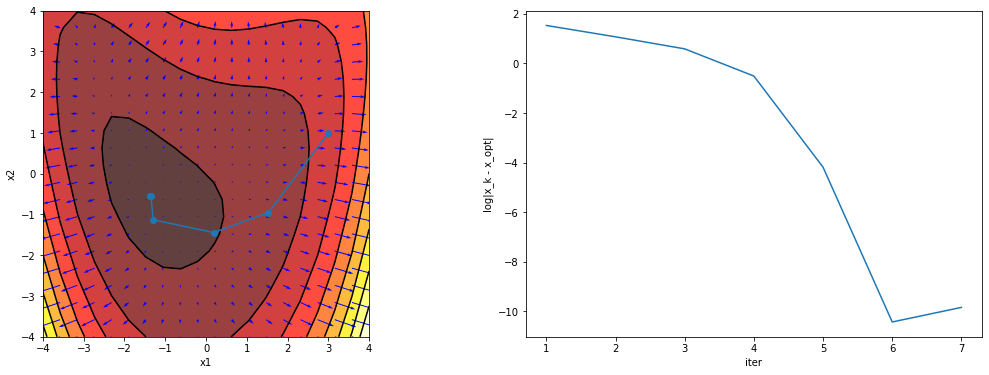

In [4]:
thres = 1e-6
iter_max = 1000
alpha = 1.0
ini_val = np.array([3.0, 1.0])

x1 = np.linspace(-4, 4, 20)  # x1.shape = (20, )
x2 = np.linspace(-4, 4, 20)  # x2.shape = (20, )
X1, X2 = np.meshgrid(x1, x2)  # X1.shape = (20, 20), X2.shape = (20, 20)
X = np.array([X1, X2])  # X.shape = (2, 20, 20)
Z = f(X)  # Z.shape = (20, 20)
gradient = grad_f(X)  # gradiend.shape = (2, 20, 20)
grad_x1 = gradient[0] # grad_x1.shape = (20, 20)
grad_x2 = gradient[1] # grad_x2.shape = (20, 20)

agd = NewtonGradientDescent(f, grad_f, hess_f, thres, iter_max, alpha)
agd.minimize(ini_val)
path = agd.path
theor_opt_pt = np.array([-1.3647, -0.5344])
abs_path = np.array([np.log(np.linalg.norm(path[i, :] - theor_opt_pt)) for i in range(path.shape[0])])
iter_path = np.arange(1, path.shape[0] + 1)

print("iter.cnt. = {}".format(agd.iter_count))
print("theor.opt.pt. = {}".format(theor_opt_pt))
print("theor.opt.val. = {}".format(f(theor_opt_pt)))
print("emp.opt.pt. = {}".format(agd.opt_pt))
print("emp.opt.val. = {}".format(agd.opt_val))

fig = plt.figure(figsize=(18, 6))
axL = fig.add_subplot(1, 2, 1)
axL.contourf(x1, x2, Z, 10, alpha = .75, cmap = plt.cm.hot)
axL.contour(x1, x2, Z, levels = 10, colors = "black")
axL.quiver(x1, x2 , grad_x1, grad_x2, color = "blue")
axL.plot(path[:,0], path[:,1], marker = "o")
axL.set_xlabel("x1")
axL.set_ylabel("x2")
axL.set_aspect('equal')

axR = fig.add_subplot(1, 2, 2)
axR.set_xlabel("iter")
axR.set_ylabel("log|x_k - x_opt|")
axR.plot(iter_path, abs_path)

plt.show()